<a href="https://colab.research.google.com/github/harsh-vt/transfer_learning/blob/master/transfer_learning_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
train_data = pd.read_csv('training_data.csv')

In [3]:
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,...,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BQ,BR,BS,BT,BU,BV,BW,BX,BY,BZ,CA,CB,CC,CD,CE,CF,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CQ
0,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,7,35,0,200,1
1,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,1,0,0,0,0,0,40,0.0,11,5,0,20,1
2,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,40,0.0,12,5,0,305,1
3,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,17,35,0,110,1
4,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,1,0,0,0,85,0.0,19,20,0,75,5


In [0]:
import numpy as np

In [0]:
xy = np.array(train_data)

In [6]:
print(xy)

[[  0.   1.   0. ...   0. 200.   1.]
 [  0.   1.   0. ...   0.  20.   1.]
 [  0.   1.   0. ...   0. 305.   1.]
 ...
 [  1.   0.   0. ...   0.  13.   4.]
 [  1.   0.   0. ...   0.   0.   4.]
 [  0.   0.   1. ...   0.   0.   2.]]


In [0]:
np.random.shuffle(xy)

In [214]:
y = xy[:, -1:]
x = xy[:, 0:-1]
print(y)
print(x)

[[5.]
 [1.]
 [5.]
 ...
 [5.]
 [5.]
 [5.]]
[[  0.   1.   0. ...  15.   0.  35.]
 [  0.   0.   1. ...  30.   0. 540.]
 [  0.   1.   0. ...  21.   0. 524.]
 ...
 [  0.   1.   0. ...  15.   0. 105.]
 [  0.   0.   1. ...  30.   0. 300.]
 [  0.   0.   1. ...  10.   0.  45.]]


In [0]:
x=x/x.max(axis=0)

In [0]:
k = 3500
l = 100
x_train = x[0:k,:]
y_train = y[0:k,:]
x_val = x[k:k+l,:]
y_val = y[k:k+l,:]
x_test = x[k+l:,:]
y_test = y[k+l:,:]

In [217]:
print(x_train.shape)
# print(x_train)
print()
print(y_train.shape)
# print(y_train)
print()
print(x_val.shape)
# print(x_val)
print()
print(y_val.shape)
# print(y_val)
print()
print(x_test.shape)
# print(x_test)
print()
print(y_test.shape)
# print(y_test)

(3500, 87)

(3500, 1)

(100, 87)

(100, 1)

(68, 87)

(68, 1)


In [0]:
def baseline_model():

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(87, input_dim=input_shape, activation='sigmoid'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(124, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(7,activation='softmax'))

  # Compile model
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

Epoch 1/200
110/110 [==============================] - 0s 4ms/step - loss: 1.6462 - accuracy: 0.4026 - val_loss: 1.2801 - val_accuracy: 0.5100
Epoch 2/200
110/110 [==============================] - 0s 4ms/step - loss: 1.3026 - accuracy: 0.5346 - val_loss: 1.0866 - val_accuracy: 0.5800
Epoch 3/200
110/110 [==============================] - 0s 4ms/step - loss: 1.1692 - accuracy: 0.5617 - val_loss: 0.9646 - val_accuracy: 0.6100
Epoch 4/200
110/110 [==============================] - 0s 3ms/step - loss: 1.1082 - accuracy: 0.5929 - val_loss: 0.8848 - val_accuracy: 0.6400
Epoch 5/200
110/110 [==============================] - 0s 3ms/step - loss: 1.0767 - accuracy: 0.5983 - val_loss: 0.8831 - val_accuracy: 0.6400
Epoch 6/200
110/110 [==============================] - 0s 4ms/step - loss: 1.0332 - accuracy: 0.6171 - val_loss: 0.8532 - val_accuracy: 0.6200
Epoch 7/200
110/110 [==============================] - 0s 3ms/step - loss: 1.0022 - accuracy: 0.6134 - val_loss: 0.8785 - val_accuracy: 0.6500

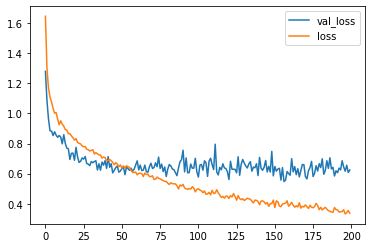

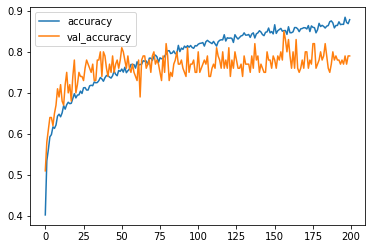

87


In [293]:
import tensorflow as tf
from matplotlib import pyplot as plt

input_shape = x_train.shape[1]

model = baseline_model()

# es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

hist = model.fit(x_train, y_train, epochs=200,  validation_data=(x_val, y_val))
plt.plot(hist.history['val_loss'])
plt.show
plt.plot(hist.history['loss'])
plt.legend(["val_loss", "loss"], loc ="best") 
plt.show()

plt.plot(hist.history['accuracy'])
plt.show
plt.plot(hist.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"], loc ="best") 
plt.show()
print(input_shape)

In [289]:
predicted = model.evaluate(x_test,y_test) 

3/3 [==============================] - 0s 2ms/step - loss: 0.7633 - accuracy: 0.7794
